## Dataset Information

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

## Import modules

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings  
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [39]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [40]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing the dataset

In [41]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [42]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [43]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [44]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [45]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [46]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [47]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

## Exploratory Data Analysis

In [49]:
pip install wordcloud

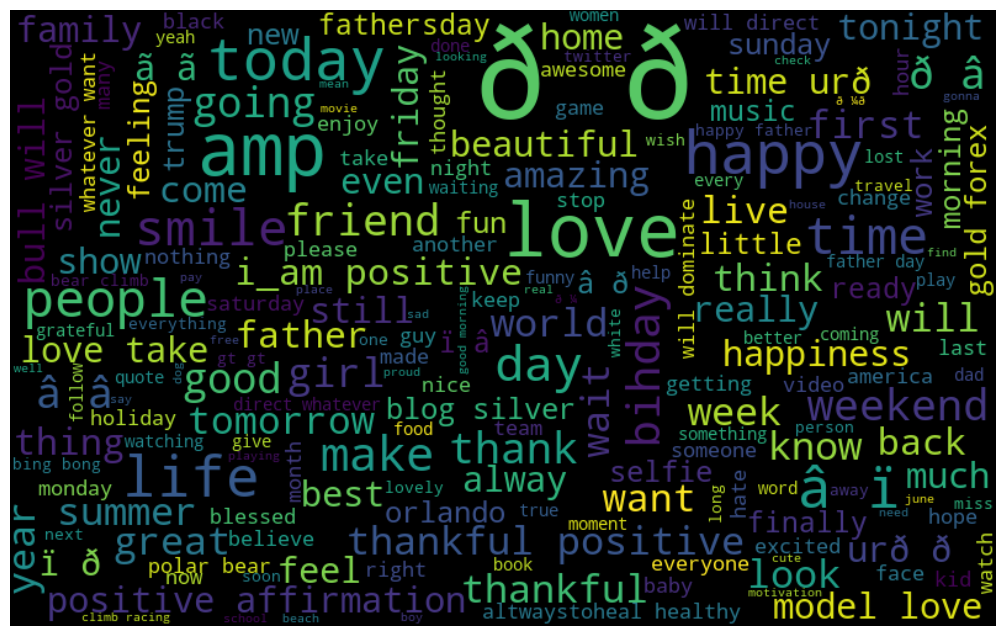

In [66]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

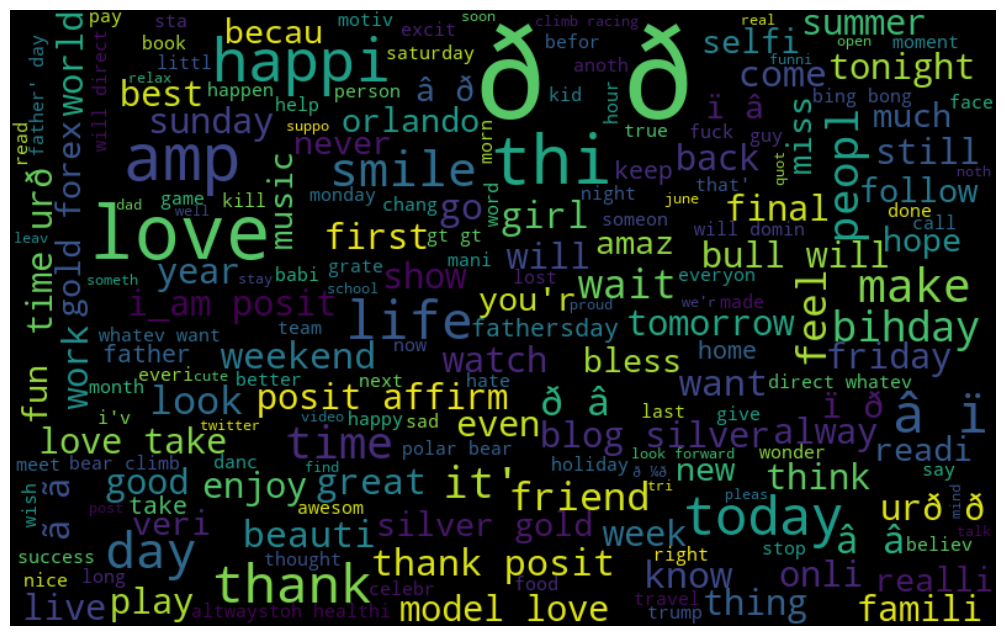

In [15]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

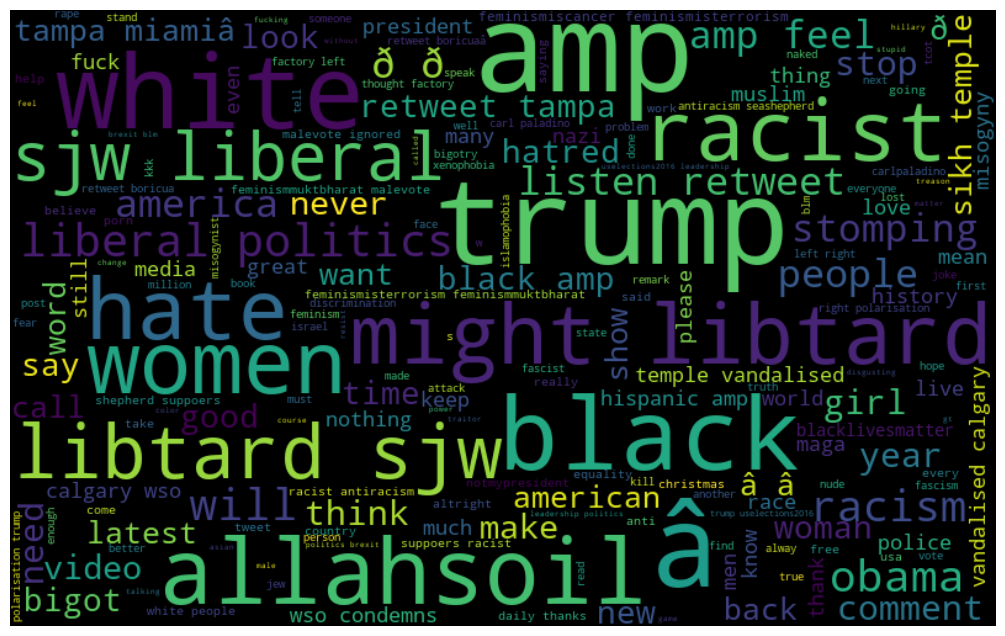

In [68]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [69]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [70]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [71]:
ht_positive[:5]

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [72]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [73]:
ht_positive[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [74]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364


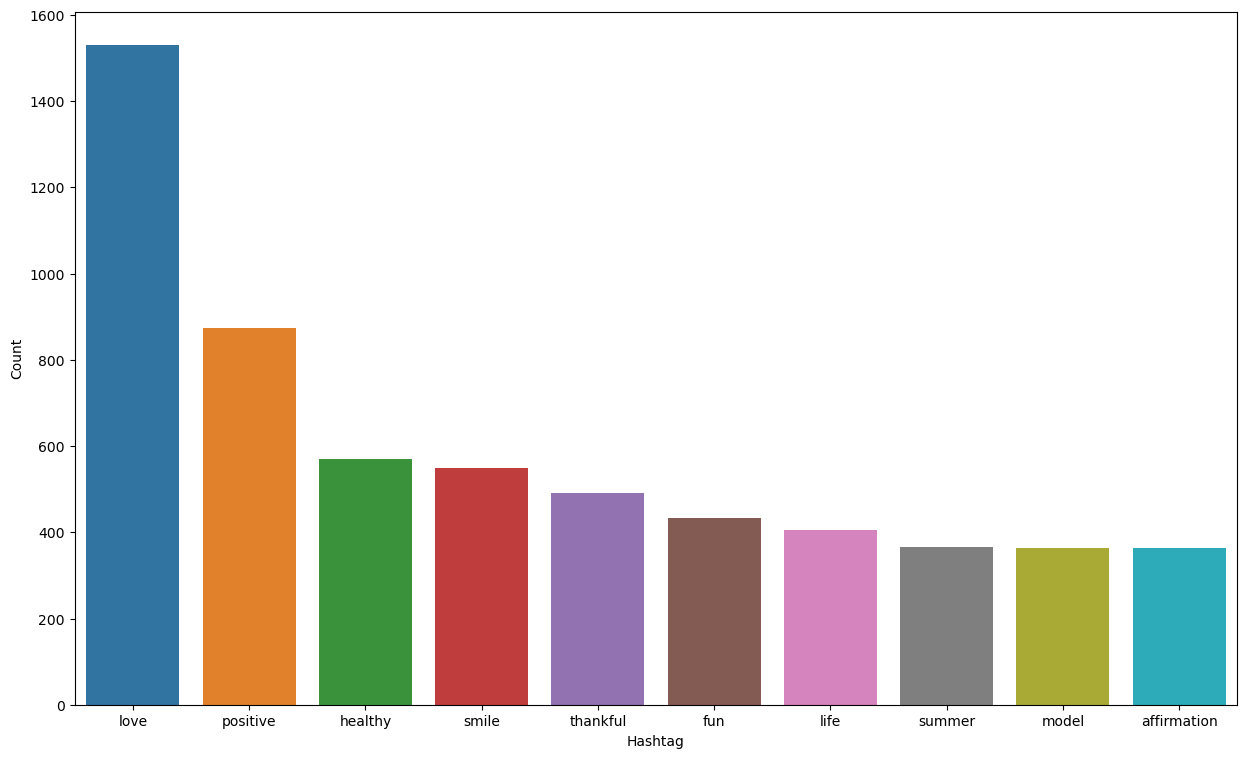

In [75]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [76]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


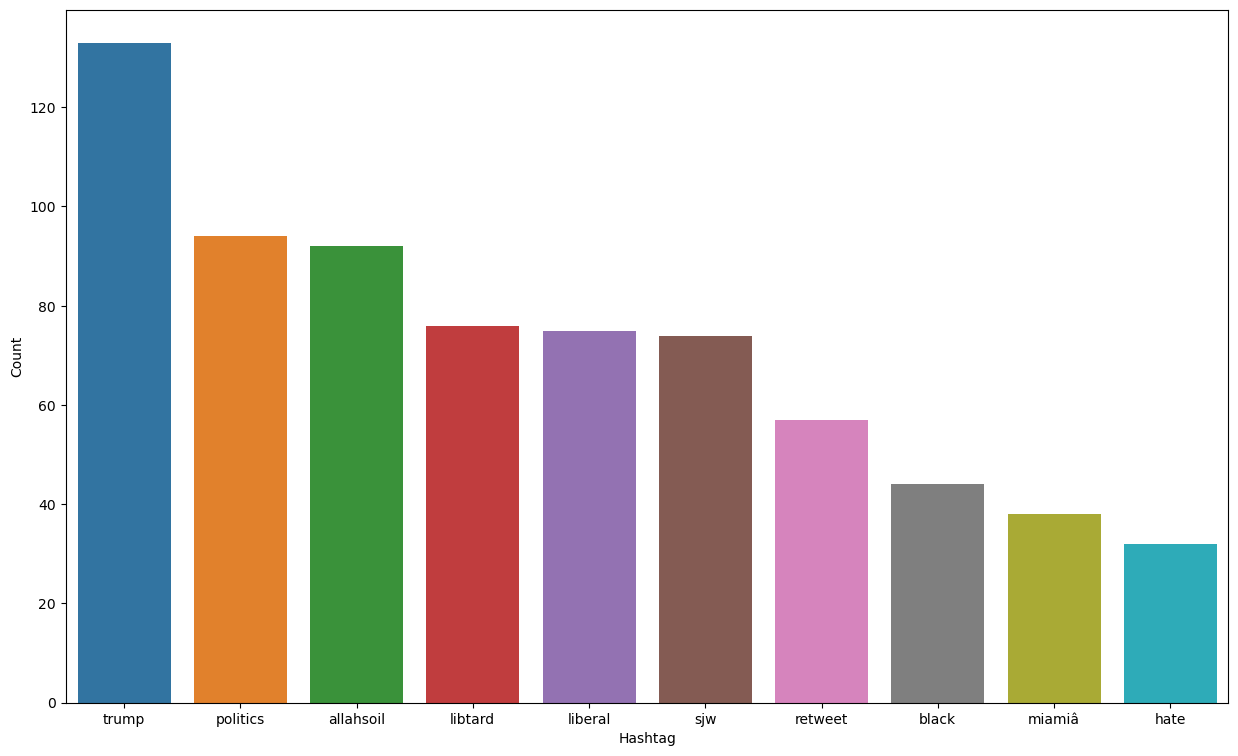

In [77]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

## Input Split

In [78]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [28]:
# bow[0].toarray()

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

## Model Training

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [81]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [82]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.48058252427184467

In [83]:
accuracy_score(y_test,pred)

0.9464397447128019

In [84]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)  # Use built-in int type instead of np.int

f1_score(y_test, pred) 


0.5301204819277109

In [85]:
accuracy_score(y_test,pred)

0.9414341133775498

In [86]:

pred_prob[0][1] >= 0.3


False

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Make predictions using the model
linear_pred = linear_model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, linear_pred)
mse = mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)

# Print the evaluation metrics
print("Linear Regression - Mean Absolute Error:", mae)
print("Linear Regression - Mean Squared Error:", mse)
print("Linear Regression - R-squared:", r2)

# Plot a scatter plot to visualize the predictions along with a line representing perfect predictions
#plt.figure(figsize=(10, 6))
#plt.scatter(y_test, linear_pred, color='blue', label='Actual vs. Predicted')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions')
#plt.title('Linear Regression Model: Actual vs. Predicted')
#plt.xlabel('Actual Values')
#plt.ylabel('Predicted Values')
#plt.legend()
#plt.show()


Linear Regression - Mean Absolute Error: 0.10996431810499122
Linear Regression - Mean Squared Error: 0.045959175039237604
Linear Regression - R-squared: 0.29358977472104053


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

multiple_model = LinearRegression()
multiple_model.fit(x_train, y_train)
multiple_pred = multiple_model.predict(x_test)

mae_multiple = mean_absolute_error(y_test, multiple_pred)
mse_multiple = mean_squared_error(y_test, multiple_pred)
r2_multiple = r2_score(y_test, multiple_pred)

print("Multiple Regression - Mean Absolute Error:", mae_multiple)
print("Multiple Regression - Mean Squared Error:", mse_multiple)
print("Multiple Regression - R-squared:", r2_multiple)


Multiple Regression - Mean Absolute Error: 0.10996431810499122
Multiple Regression - Mean Squared Error: 0.045959175039237604
Multiple Regression - R-squared: 0.29358977472104053


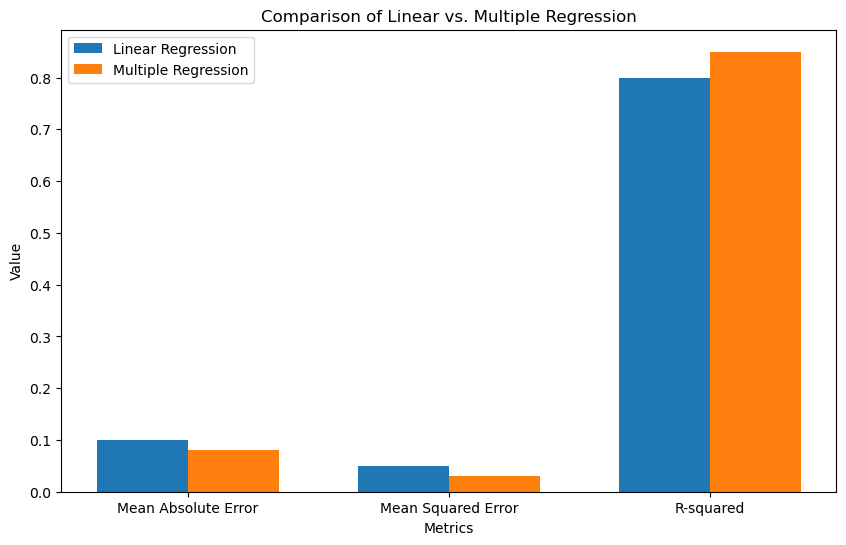

In [37]:
import matplotlib.pyplot as plt

# Define metrics labels
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']

# Assuming you have pre-computed metric values (replace with your actual values)
mae = 0.1  # Mean Absolute Error for linear regression
mse = 0.05  # Mean Squared Error for linear regression
r2 = 0.8  # R-squared for linear regression

mae_multiple = 0.08  # Mean Absolute Error for multiple regression
mse_multiple = 0.03  # Mean Squared Error for multiple regression
r2_multiple = 0.85  # R-squared for multiple regression

# Calculate the number of metrics
num_metrics = len(metrics)

# Create a bar graph
plt.figure(figsize=(10, 6))  # Set the figure size

# Define bar width and index for bar positions
bar_width = 0.35
index = range(num_metrics)

# Plot bars for linear regression metrics
plt.bar(index, [mae, mse, r2], bar_width, label='Linear Regression')

# Plot bars for multiple regression metrics with shifted positions
plt.bar([i + bar_width for i in index], [mae_multiple, mse_multiple, r2_multiple], bar_width, label='Multiple Regression')

# Set labels for the axes
plt.xlabel('Metrics')
plt.ylabel('Value')

# Set the title for the plot
plt.title('Comparison of Linear vs. Multiple Regression')

# Set tick labels for the x-axis, considering the bar width
plt.xticks([i + bar_width / 2 for i in index], metrics)

# Add a legend to distinguish between bars
plt.legend()

# Display the bar graph
plt.show()

